In [1]:
import datetime
import numpy as np
import pandas as pd
import great_expectations as ge
import great_expectations.jupyter_ux
from great_expectations.datasource.types import BatchKwargs

from matplotlib import pyplot as plt

%matplotlib inline

2020-12-07T14:29:30+0300 - INFO - Great Expectations logging enabled at 20 level by JupyterUX module.


## Great Expectations ?

* Помощь в работе с данными (фиксация очистки, трансформирования) и мониторинге

* Помощь в нормализации данных

* Улучшение взаимодействия аналитиков и инженеров

* Построение автоматической верификации новых данных 

* Ускорение поиска ошибок в данных

* Улучшение передачи данных между командами

* Построение документации для данных


[ge link](https://docs.greatexpectations.io)

**Базовая схема использования**
![](ge_usercase.jpg)

In [2]:
# загрузка контексат kedro
from kedro.context import load_context
from kedro.extras.datasets.api import APIDataSet
import json

context = load_context("../")
catalog = context.catalog

2020-12-07 14:29:31,177 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\fsspec\implementations\local.py:29: FutureWarning: The default value of auto_mkdir=True has been deprecated and will be changed to auto_mkdir=False by default in a future release.
  warnings.warn(



In [4]:
catalog.load('trip_data')

2020-12-07 14:02:02,534 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2020-12-07 14:02:02,542 - kedro.io.data_catalog - INFO - Loading data from `trip_data` (CSVDataSet)...


,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32
354150,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,32


In [4]:
# DF Kedro -> GE
df = ge.dataset.PandasDataset(catalog.load('trip_data'))
# или from_pandas(catalog.load('trip_data'))

df

2020-12-07 14:31:29,975 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2020-12-07 14:31:29,979 - kedro.io.data_catalog - INFO - Loading data from `trip_data` (CSVDataSet)...


,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32
354150,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,32


In [5]:
df.dtypes

2020-12-07 14:31:33,797 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Trip_ID                     int64
Duration                    int64
Start_Date         datetime64[ns]
Start_Station              object
Start_Terminal              int64
End_Date           datetime64[ns]
End_Station                object
End_Terminal                int64
Bike_#                      int64
Subscriber_Type            object
Zip_Code                   object
dtype: object

## Создадим статистику по данным

[Весь доступный глоссарий статистик](https://docs.greatexpectations.io/en/latest/reference/glossary_of_expectations.html)

2020-12-07 14:02:09,312 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



(array([12748.,  3554.,  1807., 11115., 21786., 48841., 43684., 83825.,
        95925., 30867.]),
 array([ 2. , 10.2, 18.4, 26.6, 34.8, 43. , 51.2, 59.4, 67.6, 75.8, 84. ]),
 <BarContainer object of 10 artists>)

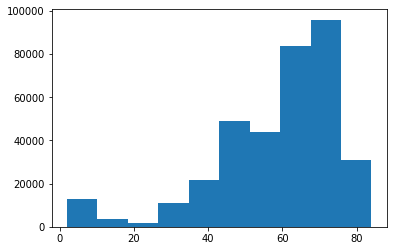

In [6]:
plt.hist(df['Start_Terminal'])

(array([310217.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  43935.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

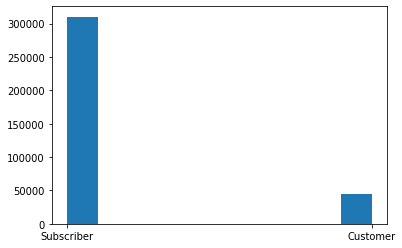

In [16]:
plt.hist(df['Subscriber_Type'])

In [14]:
# разделить данные на бины и вероятности этих бинов
df_parts = ge.dataset.util.partition_data(df['Duration'])
df_parts['bins']

array([6.00000000e+01, 7.12225226e+01, 8.24450452e+01, ...,
       1.72703776e+07, 1.72703888e+07, 1.72704000e+07])

In [15]:
df_parts['weights']

array([9.23332354e-04, 9.57216111e-04, 1.09839843e-03, ...,
       0.00000000e+00, 0.00000000e+00, 2.82364634e-06])

In [39]:
df.expect_column_values_to_be_between(column='Start_Terminal', min_value=0, max_value=100)

{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 354152,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

In [40]:
df.expect_column_values_to_be_of_type(column='End_Station', type_='object')

2020-12-06 22:25:48,679 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": "object_"
  },
  "exception_info": null
}

In [18]:
df.expect_column_values_to_match_regex(column='Subscriber_Type',regex=r'^S\w+')

2020-12-07 14:09:44,769 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": false,
  "meta": {},
  "result": {
    "element_count": 354152,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 43935,
    "unexpected_percent": 12.405690212112313,
    "unexpected_percent_nonmissing": 12.405690212112313,
    "partial_unexpected_list": [
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer",
      "Customer"
    ]
  },
  "exception_info": null
}

In [14]:
# expect_column_values_to_be_in_set
df.expect_column_distinct_values_to_be_in_set('Zip_Code',
                                              list(df['Zip_Code'].unique())[:len(list(df['Zip_Code'].unique())) - 10],
                                              #mostly = .99
                                              )

2020-12-07 14:36:17,267 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "result": {
    "observed_value": [
      "0",
      "1",
      "100",
      "1000",
      "10000",
      "10001",
      "10002",
      "10003",
      "10004",
      "100045",
      "10005",
      "10006",
      "10007",
      "10008",
      "10009",
      "10010",
      "10011",
      "10012",
      "10013",
      "10014",
      "10015",
      "10016",
      "10017",
      "10018",
      "10019",
      "1002",
      "10021",
      "10022",
      "10023",
      "10024",
      "10025",
      "10026",
      "10027",
      "10028",
      "10029",
      "1003",
      "10030",
      "10031",
      "10032",
      "10034",
      "10035",
      "10036",
      "10037",
      "10038",
      "10039",
      "1004",
      "10040",
      "1004004",
      "10046",
      "100600",
      "10065",
      "10069",
      "10072",
      "10075",
      "1009",
      "1010",
      "10100",
      "1011",
      "10115",
      "10117",
      "10118",
      "10128",
      "1013",
      "101300",
      "10137"

In [42]:
df.expect_column_unique_value_count_to_be_between(column='Bike_#', min_value=1, max_value=500)

2020-12-06 22:25:49,285 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": false,
  "meta": {},
  "result": {
    "observed_value": 668,
    "element_count": 354152,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null
}

---------------------------

А что с этой статистикой делать?

Как использовать Ge?

### Исследование

In [21]:
# обратимся к GE контексту
context_ge = ge.data_context.DataContext("..")

2020-12-07 14:13:44,476 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\jsonschema\validators.py:928: DeprecationWarning: The metaschema specified by $schema was not found. Using the latest draft to validate, but this will raise an error in the future.
  cls = validator_for(schema)



In [19]:
# создадим время испольнения 
run_id = datetime.datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
run_id

'2020-12-07 07:26:45'

In [119]:
# есть доступные имена? Уже создавали?
context_ge.list_expectation_suite_names()


['bike.table.trips']

In [120]:
[datasource['name'] for datasource in context_ge.list_datasources() if datasource['class_name'] == 'PandasDatasource']

['pandas_datasource']

In [16]:
# загрузка данных
df = ge.dataset.PandasDataset(catalog.load('trip_data'))
df.head(5)

2020-12-07 10:24:56,434 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2020-12-07 10:24:56,437 - kedro.io.data_catalog - INFO - Loading data from `trip_data` (CSVDataSet)...


,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


In [35]:
# создание каталога
batch_kwargs = {'dataset': catalog.load('trip_data').head(5), 'datasource': 'trip_df'}

batch_kwargs

2020-12-07 11:56:40,262 - kedro.io.data_catalog - INFO - Loading data from `trip_data` (CSVDataSet)...


{'dataset':    Trip_ID  Duration          Start_Date  \
 0   913460       765 2015-08-31 23:26:00   
 1   913459      1036 2015-08-31 23:11:00   
 2   913455       307 2015-08-31 23:13:00   
 3   913454       409 2015-08-31 23:10:00   
 4   913453       789 2015-08-31 23:09:00   
 
                           Start_Station  Start_Terminal            End_Date  \
 0  Harry Bridges Plaza (Ferry Building)              50 2015-08-31 23:39:00   
 1           San Antonio Shopping Center              31 2015-08-31 23:28:00   
 2                        Post at Kearny              47 2015-08-31 23:18:00   
 3                    San Jose City Hall              10 2015-08-31 23:17:00   
 4                 Embarcadero at Folsom              51 2015-08-31 23:22:00   
 
                                 End_Station  End_Terminal  Bike_#  \
 0  San Francisco Caltrain (Townsend at 4th)            70     288   
 1                   Mountain View City Hall            27      35   
 2                       

In [121]:
# устанавливаем батч в GE (но почему-то не правильно?)
barch = context_ge.get_batch(batch_kwargs, 'bike')

DataContextError: expectation_suite bike not found

## Давайте попробуем ещё раз

In [27]:
context_ge = ge.data_context.DataContext("..")

# создаем набор параметров (вот, что мы забыли - 1)
expectation_suite_name = "bike.table.trips._" # имя набора
context_ge.create_expectation_suite(expectation_suite_name)

{
  "meta": {
    "great_expectations_version": "0.13.1"
  },
  "expectation_suite_name": "bike.table.trips._",
  "data_asset_type": null,
  "expectations": []
}

In [28]:
# определяем тип ресурсов (вот, что мы забыли - 2)
context_ge.add_datasource('pandas_datasource', class_name='PandasDatasource')
batch_kwargs = {'dataset': catalog.load('trip_data').head(5), 'datasource': "pandas_datasource"}

batch_kwargs

2020-12-07 14:14:46,871 - kedro.io.data_catalog - INFO - Loading data from `trip_data` (CSVDataSet)...


{'dataset':    Trip_ID  Duration          Start_Date  \
 0   913460       765 2015-08-31 23:26:00   
 1   913459      1036 2015-08-31 23:11:00   
 2   913455       307 2015-08-31 23:13:00   
 3   913454       409 2015-08-31 23:10:00   
 4   913453       789 2015-08-31 23:09:00   
 
                           Start_Station  Start_Terminal            End_Date  \
 0  Harry Bridges Plaza (Ferry Building)              50 2015-08-31 23:39:00   
 1           San Antonio Shopping Center              31 2015-08-31 23:28:00   
 2                        Post at Kearny              47 2015-08-31 23:18:00   
 3                    San Jose City Hall              10 2015-08-31 23:17:00   
 4                 Embarcadero at Folsom              51 2015-08-31 23:22:00   
 
                                 End_Station  End_Terminal  Bike_#  \
 0  San Francisco Caltrain (Townsend at 4th)            70     288   
 1                   Mountain View City Hall            27      35   
 2                       

In [29]:
batch = context_ge.get_batch(batch_kwargs, expectation_suite_name)
batch.head()

2020-12-07 14:14:50,129 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


### Теперь запомним наши данные, что мы ожидаем от Train

In [31]:
batch.expect_column_values_to_be_unique('Trip_ID')

{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 5,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

In [32]:
batch.expect_column_values_to_not_be_null("Trip_ID")

2020-12-07 14:14:56,267 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 5,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

In [33]:
batch.expect_column_mean_to_be_between("Duration", batch["Duration"].min(), batch["Duration"].max())

2020-12-07 14:14:56,706 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 661.2,
    "element_count": 5,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null
}

In [34]:
batch.expect_column_values_to_be_unique("Trip_ID")

2020-12-07 14:14:57,178 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 5,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

In [35]:
batch.expect_column_values_to_be_in_set('Subscriber_Type', list(batch['Subscriber_Type'].unique()), mostly=.99)

2020-12-07 14:14:57,671 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 5,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

In [36]:
batch.expect_column_values_to_match_regex('Start_Station',regex=r'^\w+ \w+ \w+')#, mostly=.90)

2020-12-07 14:14:58,132 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 5,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": null
}

### Посмотрим все фиксы в наборе

In [37]:
batch.get_expectation_suite()

2020-12-07 14:15:00,210 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2020-12-07T14:15:00+0300 - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.
2020-12-07 14:15:00,214 - great_expectations.data_asset.data_asset - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.


{
  "meta": {
    "great_expectations_version": "0.13.1"
  },
  "expectation_suite_name": "bike.table.trips._",
  "data_asset_type": "Dataset",
  "expectations": [
    {
      "kwargs": {
        "column": "Trip_ID"
      },
      "expectation_type": "expect_column_values_to_be_unique",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Trip_ID"
      },
      "expectation_type": "expect_column_values_to_not_be_null",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Duration",
        "min_value": 307,
        "max_value": 1036
      },
      "expectation_type": "expect_column_mean_to_be_between",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Subscriber_Type",
        "value_set": [
          "Subscriber",
          "Customer"
        ],
        "mostly": 0.99
      },
      "expectation_type": "expect_column_values_to_be_in_set",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Start_Station",
        "regex": "^

In [42]:
batch.save_expectation_suite(discard_failed_expectations=False)

# зафиксируем время создание данного обзора
run_id = {
  "run_name": "bike.train.part_trip",
  "run_time": datetime.datetime.utcnow()
}
results = context_ge.run_validation_operator("action_list_operator", assets_to_validate=[batch], run_id=run_id)

2020-12-07T14:18:05+0300 - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.
2020-12-07 14:18:05,992 - great_expectations.data_asset.data_asset - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.
2020-12-07 14:18:06,014 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\jsonschema\validators.py:928: DeprecationWarning: The metaschema specified by $schema was not found. Using the latest draft to validate, but this will raise an error in the future.
  cls = validator_for(schema)

2020-12-07T14:18:06+0300 - INFO - 	5 expectation(s) included in expectation_suite.
2020-12-07 14:18:06,043 - great_expectations.data_asset.data_asset - INFO - 	5 expectation(s) included in expectation_suite.
2020-12-07 14:18:06,068 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\jsonschema\validators.py:928: DeprecationWarning: The metaschema specified by $schema was not found. Using the latest 

In [43]:
# словарь результатов (с ним можно будет сравнивать)
results

2020-12-07 14:18:07,005 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{
  "run_results": {
    "ValidationResultIdentifier::bike/table/trips/_/bike.train.part_trip/20201207T111806.034964Z/9bb1b70448cf24232bb18d3f2bbe8748": {
      "validation_result": {
        "results": [
          {
            "success": true,
            "meta": {},
            "result": {
              "element_count": 5,
              "missing_count": 0,
              "missing_percent": 0.0,
              "unexpected_count": 0,
              "unexpected_percent": 0.0,
              "unexpected_percent_nonmissing": 0.0,
              "partial_unexpected_list": [],
              "partial_unexpected_index_list": [],
              "partial_unexpected_counts": []
            },
            "expectation_config": {
              "kwargs": {
                "column": "Trip_ID",
                "result_format": {
                  "result_format": "SUMMARY"
                }
              },
              "expectation_type": "expect_column_values_to_be_unique",
              "meta": {}
   

In [45]:
# сделаем валиадацию данных
df.tail(100).validate(expectation_suite=batch.get_expectation_suite())  #result

2020-12-07T14:18:23+0300 - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.
2020-12-07 14:18:23,949 - great_expectations.data_asset.data_asset - INFO - 	5 expectation(s) included in expectation_suite. result_format settings filtered.


{
  "results": [
    {
      "success": true,
      "meta": {},
      "result": {
        "element_count": 100,
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_list": []
      },
      "expectation_config": {
        "kwargs": {
          "column": "Trip_ID"
        },
        "expectation_type": "expect_column_values_to_be_unique",
        "meta": {}
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "success": true,
      "meta": {},
      "result": {
        "element_count": 100,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": []
      },
      "expectation_config": {
        "kwargs": {
          "column": "Trip_ID"
        },
        "expectation_type": "expect_col

In [46]:
# создаем html документацию
context_ge.build_data_docs()
context_ge.open_data_docs()

2020-12-07 14:18:26,182 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2020-12-07 14:18:26,869 - py.warnings - WARNING - c:\program files\python38\lib\site-packages\jsonschema\validators.py:928: DeprecationWarning: The metaschema specified by $schema was not found. Using the latest draft to validate, but this will raise an error in the future.
  cls = validator_for(schema)

